# Recurrent Neural Networks for Simple Time Series Data (Synthetic Data) by `Mr. Harshit Dawar`

## Importing the Required Libraries

In [1]:
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

### Generating Data without Noise 

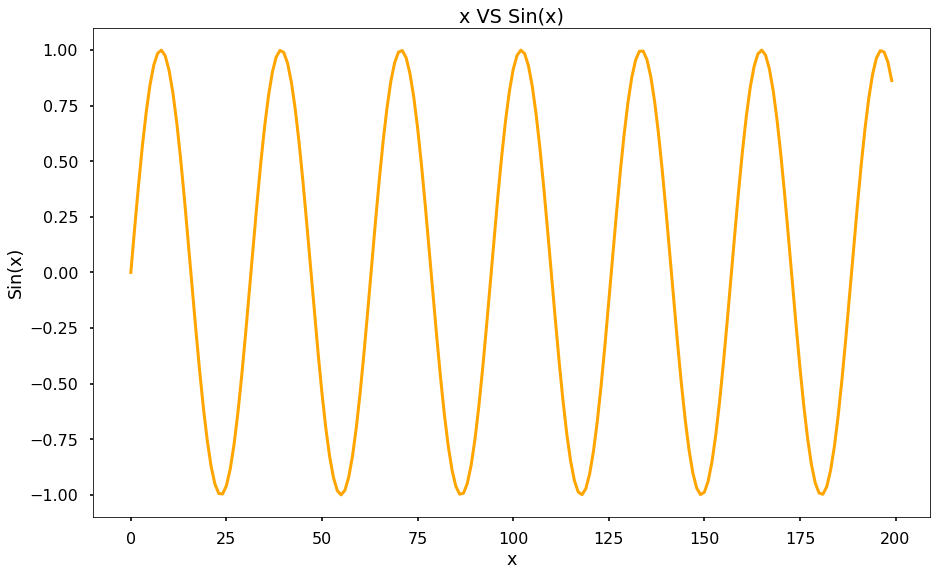

In [2]:
syntheticTimeSeriesData = np.sin(0.2 * np.arange(200))
plt.style.use("seaborn-poster")
plt.figure(figsize = (15, 9))
plt.plot(syntheticTimeSeriesData, c = "orange", linestyle = "solid", linewidth = 3)
plt.title("x VS Sin(x)")
plt.xlabel("x")
plt.ylabel("Sin(x)")
plt.show()

In [3]:
T = 15
Dimension = 1
data = []
forecast = []

for t in range(len(syntheticTimeSeriesData) - T):
    data.append(
        syntheticTimeSeriesData[t : t + T]
    )
    forecast.append(
        syntheticTimeSeriesData[t + T]
    )

data = np.array(data)
forecast = np.array(forecast)

In [4]:
data.shape, forecast.shape

((185, 15), (185,))

In [5]:
data[0]

array([0.        , 0.19866933, 0.38941834, 0.56464247, 0.71735609,
       0.84147098, 0.93203909, 0.98544973, 0.9995736 , 0.97384763,
       0.90929743, 0.8084964 , 0.67546318, 0.51550137, 0.33498815])

In [6]:
forecast[0]

0.1411200080598672

In [7]:
# Changing the shape of the data as required by the RNN (3 Dimensions)
data = data.reshape(-1, T, 1)

In [8]:
data.shape

(185, 15, 1)

### Building a Model with Activation Function

In [9]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5)(inputShape)
RNNModel = Dense(1)(RNNModel)

model = Model(inputShape, RNNModel)

model.compile(loss = "mse", optimizer = Adam(lr = 0.01))

In [10]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = model.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 80ms/step - loss: 0.8426 - val_loss: 0.5387
Epoch 2/500
3/3 [==============================] - 0s 15ms/step - loss: 0.4205 - val_loss: 0.1840
Epoch 3/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1209 - val_loss: 0.0621
Epoch 4/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0950 - val_loss: 0.1361
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.1070 - val_loss: 0.0658
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0869 - val_loss: 0.0960
Epoch 7/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0841 - val_loss: 0.0539
Epoch 8/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0492 - val_loss: 0.0481
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0439 - val_loss: 0.0348
Epoch 10/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0291 - val_loss: 0.0296
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 15ms/step - loss: 3.6034e-04 - val_loss: 3.6018e-04
Epoch 83/500
3/3 [==============================] - 0s 13ms/step - loss: 3.6499e-04 - val_loss: 3.5252e-04
Epoch 84/500
3/3 [==============================] - 0s 11ms/step - loss: 3.4867e-04 - val_loss: 3.5706e-04
Epoch 85/500
3/3 [==============================] - 0s 10ms/step - loss: 3.5025e-04 - val_loss: 3.4255e-04
Epoch 86/500
3/3 [==============================] - 0s 10ms/step - loss: 3.3045e-04 - val_loss: 3.3169e-04
Epoch 87/500
3/3 [==============================] - 0s 22ms/step - loss: 3.3997e-04 - val_loss: 3.3153e-04
Epoch 88/500
3/3 [==============================] - 0s 17ms/step - loss: 3.1623e-04 - val_loss: 3.1901e-04
Epoch 89/500
3/3 [==============================] - 0s 20ms/step - loss: 3.1511e-04 - val_loss: 3.1432e-04
Epoch 90/500
3/3 [==============================] - 0s 15ms/step - loss: 3.0024e-04 - val_loss: 3.1886e-04
Epoch 91/500
3/3 [==============================] 

3/3 [==============================] - 0s 18ms/step - loss: 1.7849e-04 - val_loss: 1.8781e-04
Epoch 159/500
3/3 [==============================] - 0s 15ms/step - loss: 1.8436e-04 - val_loss: 1.7739e-04
Epoch 160/500
3/3 [==============================] - 0s 21ms/step - loss: 1.5184e-04 - val_loss: 1.9825e-04
Epoch 161/500
3/3 [==============================] - 0s 31ms/step - loss: 1.6467e-04 - val_loss: 1.7731e-04
Epoch 162/500
3/3 [==============================] - 0s 10ms/step - loss: 1.5265e-04 - val_loss: 1.9139e-04
Epoch 163/500
3/3 [==============================] - 0s 10ms/step - loss: 1.5911e-04 - val_loss: 1.6628e-04
Epoch 164/500
3/3 [==============================] - 0s 10ms/step - loss: 1.5107e-04 - val_loss: 1.6351e-04
Epoch 165/500
3/3 [==============================] - 0s 9ms/step - loss: 1.5084e-04 - val_loss: 1.5593e-04
Epoch 166/500
3/3 [==============================] - 0s 12ms/step - loss: 1.4265e-04 - val_loss: 1.5565e-04
Epoch 167/500
3/3 [========================

3/3 [==============================] - 0s 10ms/step - loss: 9.8393e-05 - val_loss: 1.2813e-04
Epoch 235/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1550e-04 - val_loss: 1.0401e-04
Epoch 236/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1904e-04 - val_loss: 8.9929e-05
Epoch 237/500
3/3 [==============================] - 0s 10ms/step - loss: 9.8324e-05 - val_loss: 1.0455e-04
Epoch 238/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0095e-04 - val_loss: 1.2208e-04
Epoch 239/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1212e-04 - val_loss: 1.0883e-04
Epoch 240/500
3/3 [==============================] - 0s 10ms/step - loss: 9.0638e-05 - val_loss: 1.4258e-04
Epoch 241/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1805e-04 - val_loss: 1.2015e-04
Epoch 242/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0082e-04 - val_loss: 1.3920e-04
Epoch 243/500
3/3 [=======================

Epoch 310/500
3/3 [==============================] - 0s 14ms/step - loss: 6.7736e-05 - val_loss: 5.7534e-05
Epoch 311/500
3/3 [==============================] - 0s 17ms/step - loss: 5.1581e-05 - val_loss: 6.2776e-05
Epoch 312/500
3/3 [==============================] - 0s 16ms/step - loss: 5.3818e-05 - val_loss: 5.9414e-05
Epoch 313/500
3/3 [==============================] - 0s 19ms/step - loss: 5.5186e-05 - val_loss: 5.8998e-05
Epoch 314/500
3/3 [==============================] - 0s 12ms/step - loss: 5.6482e-05 - val_loss: 5.6660e-05
Epoch 315/500
3/3 [==============================] - 0s 12ms/step - loss: 5.4736e-05 - val_loss: 6.4243e-05
Epoch 316/500
3/3 [==============================] - 0s 11ms/step - loss: 6.3028e-05 - val_loss: 1.0221e-04
Epoch 317/500
3/3 [==============================] - 0s 10ms/step - loss: 7.6536e-05 - val_loss: 7.0813e-05
Epoch 318/500
3/3 [==============================] - 0s 10ms/step - loss: 6.7674e-05 - val_loss: 8.0121e-05
Epoch 319/500
3/3 [=========

Epoch 386/500
3/3 [==============================] - 0s 18ms/step - loss: 4.3309e-05 - val_loss: 4.1114e-05
Epoch 387/500
3/3 [==============================] - 0s 14ms/step - loss: 4.5273e-05 - val_loss: 5.1701e-05
Epoch 388/500
3/3 [==============================] - 0s 12ms/step - loss: 4.3969e-05 - val_loss: 5.9698e-05
Epoch 389/500
3/3 [==============================] - 0s 14ms/step - loss: 4.1732e-05 - val_loss: 6.2940e-05
Epoch 390/500
3/3 [==============================] - 0s 15ms/step - loss: 5.4656e-05 - val_loss: 3.9102e-05
Epoch 391/500
3/3 [==============================] - 0s 12ms/step - loss: 4.8314e-05 - val_loss: 6.0091e-05
Epoch 392/500
3/3 [==============================] - 0s 11ms/step - loss: 4.5247e-05 - val_loss: 6.3862e-05
Epoch 393/500
3/3 [==============================] - 0s 11ms/step - loss: 4.5643e-05 - val_loss: 4.9288e-05
Epoch 394/500
3/3 [==============================] - 0s 10ms/step - loss: 5.3760e-05 - val_loss: 4.6699e-05
Epoch 395/500
3/3 [=========

Epoch 462/500
3/3 [==============================] - 0s 20ms/step - loss: 3.8300e-05 - val_loss: 4.3111e-05
Epoch 463/500
3/3 [==============================] - 0s 29ms/step - loss: 4.3289e-05 - val_loss: 4.6565e-05
Epoch 464/500
3/3 [==============================] - 0s 14ms/step - loss: 5.3136e-05 - val_loss: 3.7545e-05
Epoch 465/500
3/3 [==============================] - 0s 14ms/step - loss: 3.8738e-05 - val_loss: 8.6385e-05
Epoch 466/500
3/3 [==============================] - 0s 12ms/step - loss: 7.9767e-05 - val_loss: 9.3834e-05
Epoch 467/500
3/3 [==============================] - 0s 12ms/step - loss: 9.0564e-05 - val_loss: 4.4878e-05
Epoch 468/500
3/3 [==============================] - 0s 14ms/step - loss: 6.7678e-05 - val_loss: 1.3005e-04
Epoch 469/500
3/3 [==============================] - 0s 22ms/step - loss: 8.2433e-05 - val_loss: 3.6950e-05
Epoch 470/500
3/3 [==============================] - 0s 17ms/step - loss: 3.9372e-05 - val_loss: 3.0601e-05
Epoch 471/500
3/3 [=========

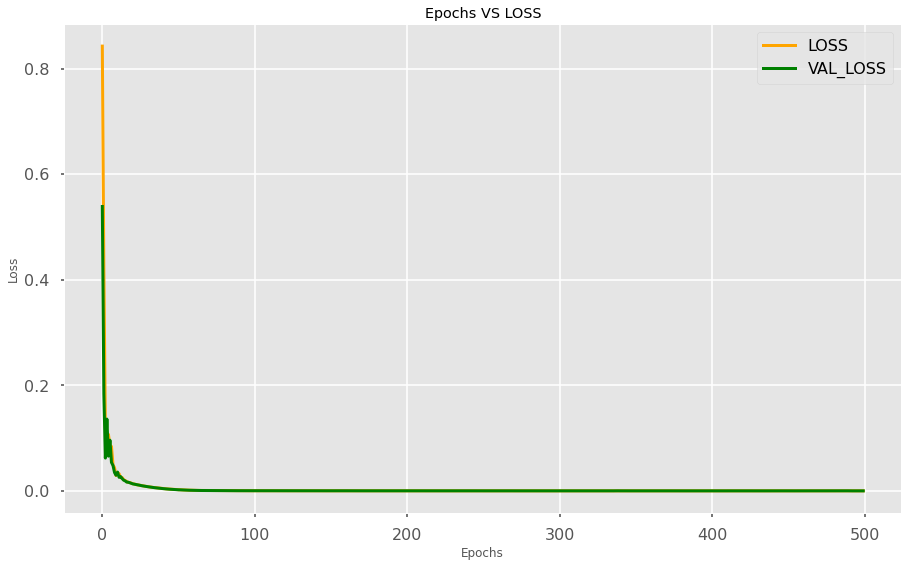

In [12]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [13]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = model.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

In [14]:
data[0].reshape(1, -1, 1).shape

(1, 15, 1)

In [15]:
data.shape

(185, 15, 1)

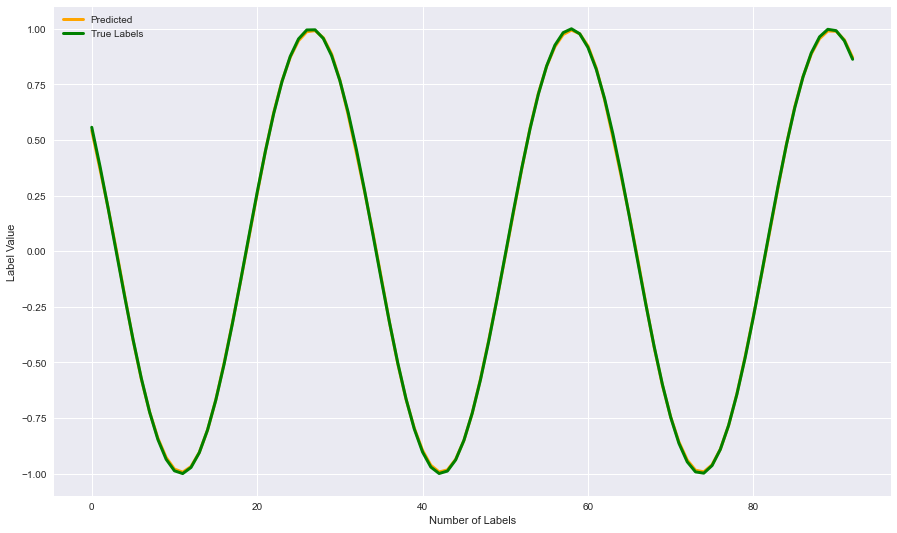

In [16]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [17]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = model.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

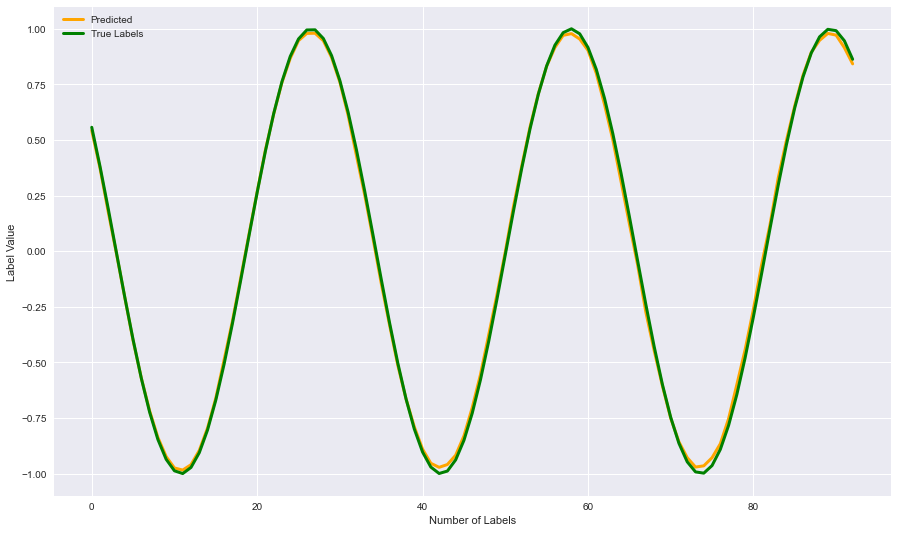

In [18]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

***Reason behind the RNN having slightly deviated predictions in this case is It provides much more flexibility than a linear model, & in the present case the data dimensionality is low, that is why linear model fits exact tot this & ***

## Building the Model with Activation None

In [19]:
inputShape = Input(shape = (T, Dimension))

# Here by default activation function is Tanh
RNNModel = SimpleRNN(5, activation = None)(inputShape)
RNNModel = Dense(1)(RNNModel)

model = Model(inputShape, RNNModel)

model.compile(loss = "mse", optimizer = Adam(lr = 0.01))
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15, 1)]           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [20]:
limit = data.shape[0] // 2

# Fitting the Model
trainedModel = model.fit(
                            data[ :limit],
                            forecast[ :limit],
                            epochs = 500,
    
                            # Reason for taking the validation set as complete seprate half, because in forecast
                            # validation should always be done on future dataset.
                            validation_data = (data[limit: ], forecast[limit: ])
                           )

Epoch 1/500
3/3 [==============================] - 0s 72ms/step - loss: 1.5665 - val_loss: 0.5159
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 0.3722 - val_loss: 0.1112
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 0.0712 - val_loss: 0.0154
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 0.0147 - val_loss: 0.0257
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.0346 - val_loss: 0.0515
Epoch 6/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.0563
Epoch 7/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0537 - val_loss: 0.0492
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0470 - val_loss: 0.0445
Epoch 9/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0433 - val_loss: 0.0416
Epoch 10/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0405 - val_loss: 0.0357
Epoch 11/500
3/3 [=

3/3 [==============================] - 0s 24ms/step - loss: 5.9689e-12 - val_loss: 5.3209e-13
Epoch 79/500
3/3 [==============================] - 0s 22ms/step - loss: 1.7750e-12 - val_loss: 5.9209e-12
Epoch 80/500
3/3 [==============================] - 0s 20ms/step - loss: 7.0072e-12 - val_loss: 7.3403e-12
Epoch 81/500
3/3 [==============================] - 0s 15ms/step - loss: 6.7867e-12 - val_loss: 6.4579e-12
Epoch 82/500
3/3 [==============================] - 0s 23ms/step - loss: 6.5771e-12 - val_loss: 6.2668e-12
Epoch 83/500
3/3 [==============================] - 0s 16ms/step - loss: 5.2023e-12 - val_loss: 3.0574e-12
Epoch 84/500
3/3 [==============================] - 0s 16ms/step - loss: 2.5812e-12 - val_loss: 1.6727e-12
Epoch 85/500
3/3 [==============================] - 0s 14ms/step - loss: 1.2215e-12 - val_loss: 3.4107e-13
Epoch 86/500
3/3 [==============================] - 0s 12ms/step - loss: 1.6635e-13 - val_loss: 1.5347e-13
Epoch 87/500
3/3 [==============================] 

3/3 [==============================] - 0s 19ms/step - loss: 1.0932e-14 - val_loss: 8.3892e-15
Epoch 155/500
3/3 [==============================] - 0s 20ms/step - loss: 1.0742e-14 - val_loss: 1.0363e-14
Epoch 156/500
3/3 [==============================] - 0s 17ms/step - loss: 1.4304e-14 - val_loss: 1.0566e-14
Epoch 157/500
3/3 [==============================] - 0s 22ms/step - loss: 1.1171e-14 - val_loss: 8.5699e-15
Epoch 158/500
3/3 [==============================] - 0s 17ms/step - loss: 1.2831e-14 - val_loss: 6.9475e-15
Epoch 159/500
3/3 [==============================] - 0s 17ms/step - loss: 1.1419e-14 - val_loss: 1.1091e-14
Epoch 160/500
3/3 [==============================] - 0s 15ms/step - loss: 1.1245e-14 - val_loss: 1.1473e-14
Epoch 161/500
3/3 [==============================] - 0s 13ms/step - loss: 1.2032e-14 - val_loss: 8.2702e-15
Epoch 162/500
3/3 [==============================] - 0s 22ms/step - loss: 1.0742e-14 - val_loss: 1.0160e-14
Epoch 163/500
3/3 [=======================

Epoch 230/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1925e-14 - val_loss: 1.0874e-14
Epoch 231/500
3/3 [==============================] - 0s 15ms/step - loss: 9.1108e-15 - val_loss: 9.5189e-15
Epoch 232/500
3/3 [==============================] - 0s 14ms/step - loss: 9.3984e-15 - val_loss: 9.3805e-15
Epoch 233/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1157e-14 - val_loss: 9.0797e-15
Epoch 234/500
3/3 [==============================] - 0s 12ms/step - loss: 9.8464e-15 - val_loss: 9.8610e-15
Epoch 235/500
3/3 [==============================] - 0s 11ms/step - loss: 1.0436e-14 - val_loss: 9.2211e-15
Epoch 236/500
3/3 [==============================] - 0s 11ms/step - loss: 1.0262e-14 - val_loss: 9.1925e-15
Epoch 237/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1309e-14 - val_loss: 9.5355e-15
Epoch 238/500
3/3 [==============================] - 0s 12ms/step - loss: 1.1445e-14 - val_loss: 9.4829e-15
Epoch 239/500
3/3 [=========

3/3 [==============================] - 0s 26ms/step - loss: 1.0823e-14 - val_loss: 9.2144e-15
Epoch 306/500
3/3 [==============================] - 0s 16ms/step - loss: 1.0140e-14 - val_loss: 8.8623e-15
Epoch 307/500
3/3 [==============================] - 0s 16ms/step - loss: 1.3559e-14 - val_loss: 1.0011e-14
Epoch 308/500
3/3 [==============================] - 0s 20ms/step - loss: 1.0102e-14 - val_loss: 9.2837e-15
Epoch 309/500
3/3 [==============================] - 0s 16ms/step - loss: 1.3607e-14 - val_loss: 9.1236e-15
Epoch 310/500
3/3 [==============================] - 0s 18ms/step - loss: 9.6365e-15 - val_loss: 1.5326e-14
Epoch 311/500
3/3 [==============================] - 0s 16ms/step - loss: 1.3451e-14 - val_loss: 9.1103e-15
Epoch 312/500
3/3 [==============================] - 0s 14ms/step - loss: 1.2403e-14 - val_loss: 8.8592e-15
Epoch 313/500
3/3 [==============================] - 0s 14ms/step - loss: 1.0065e-14 - val_loss: 1.2542e-14
Epoch 314/500
3/3 [=======================

Epoch 381/500
3/3 [==============================] - 0s 25ms/step - loss: 1.0014e-14 - val_loss: 7.8551e-15
Epoch 382/500
3/3 [==============================] - 0s 18ms/step - loss: 9.0094e-15 - val_loss: 1.0666e-14
Epoch 383/500
3/3 [==============================] - 0s 18ms/step - loss: 1.1285e-14 - val_loss: 8.1442e-15
Epoch 384/500
3/3 [==============================] - 0s 22ms/step - loss: 1.1004e-14 - val_loss: 1.1300e-14
Epoch 385/500
3/3 [==============================] - 0s 12ms/step - loss: 8.0045e-15 - val_loss: 8.2753e-15
Epoch 386/500
3/3 [==============================] - 0s 13ms/step - loss: 1.2014e-14 - val_loss: 8.6217e-15
Epoch 387/500
3/3 [==============================] - 0s 13ms/step - loss: 1.0682e-14 - val_loss: 7.8236e-15
Epoch 388/500
3/3 [==============================] - 0s 12ms/step - loss: 9.8715e-15 - val_loss: 7.3438e-15
Epoch 389/500
3/3 [==============================] - 0s 13ms/step - loss: 9.8336e-15 - val_loss: 9.4968e-15
Epoch 390/500
3/3 [=========

Epoch 457/500
3/3 [==============================] - 0s 13ms/step - loss: 1.1052e-14 - val_loss: 8.9894e-15
Epoch 458/500
3/3 [==============================] - 0s 11ms/step - loss: 1.1389e-14 - val_loss: 8.0125e-15
Epoch 459/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0162e-14 - val_loss: 6.9122e-15
Epoch 460/500
3/3 [==============================] - 0s 13ms/step - loss: 1.1178e-14 - val_loss: 6.6704e-15
Epoch 461/500
3/3 [==============================] - 0s 10ms/step - loss: 1.1211e-14 - val_loss: 8.0823e-15
Epoch 462/500
3/3 [==============================] - 0s 11ms/step - loss: 9.5311e-15 - val_loss: 1.2812e-14
Epoch 463/500
3/3 [==============================] - 0s 11ms/step - loss: 1.6081e-14 - val_loss: 1.0589e-14
Epoch 464/500
3/3 [==============================] - 0s 12ms/step - loss: 9.2603e-15 - val_loss: 8.6459e-15
Epoch 465/500
3/3 [==============================] - 0s 12ms/step - loss: 9.9088e-15 - val_loss: 8.8848e-15
Epoch 466/500
3/3 [=========

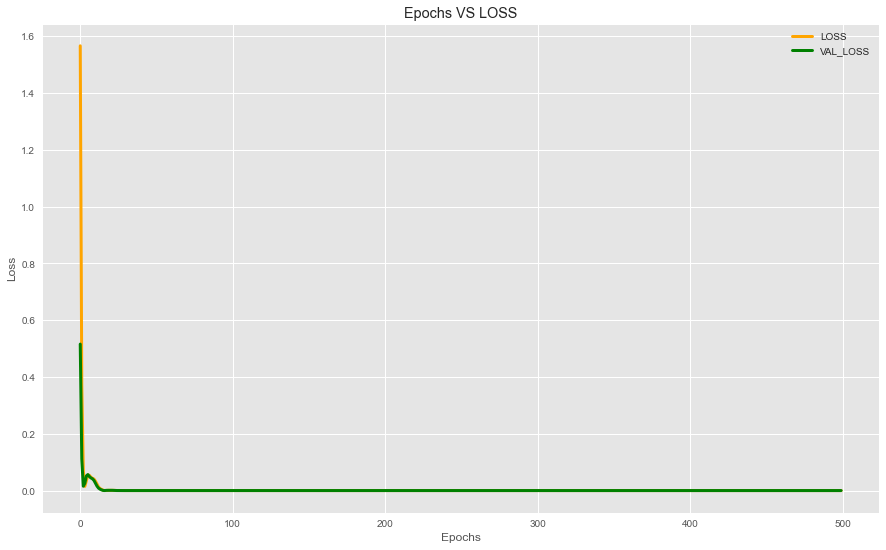

In [21]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 9))
plt.plot(trainedModel.history["loss"], c = "orange", linestyle = "solid", linewidth = 3, label = "LOSS")
plt.plot(trainedModel.history["val_loss"], c = "green", linestyle = "solid", linewidth = 3, label = "VAL_LOSS")
plt.title("Epochs VS LOSS")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
# Doing forecast using Wrong Approach
trueLabels = forecast[limit : ]
predictions = []

index = limit
while len(predictions) < len(trueLabels):
    temp = model.predict(data[index].reshape(1, -1, 1))[0, 0]
    index += 1
    predictions.append(temp)

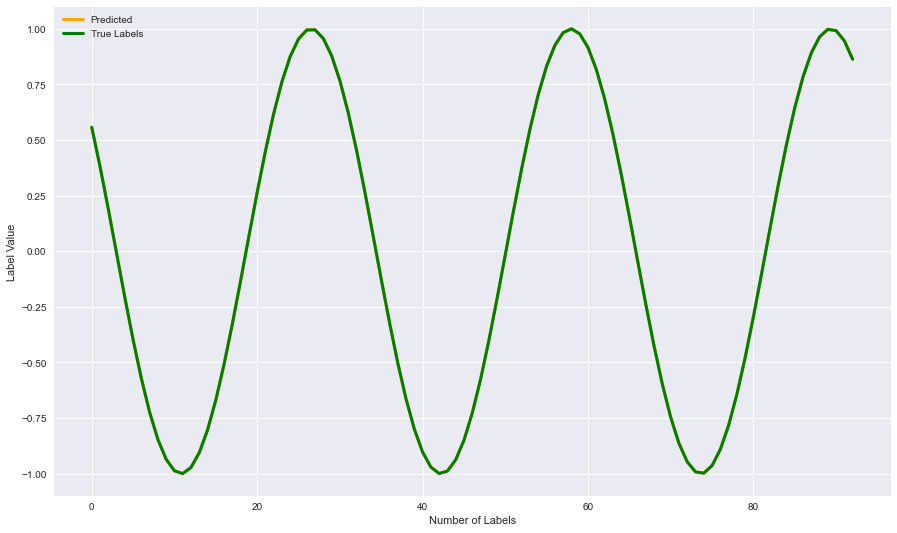

In [23]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()

In [24]:
# Forecasting with the Correct Approach
trueLabels = forecast[limit : ]
predictions = []

last_Value_Of_Data = data[limit]
while len(predictions) < len(trueLabels):
    temp = model.predict(last_Value_Of_Data.reshape(1, -1, 1))[0, 0]
    predictions.append(temp)
    
    last_Value_Of_Data = np.roll(last_Value_Of_Data, -1)
    last_Value_Of_Data[-1] = temp

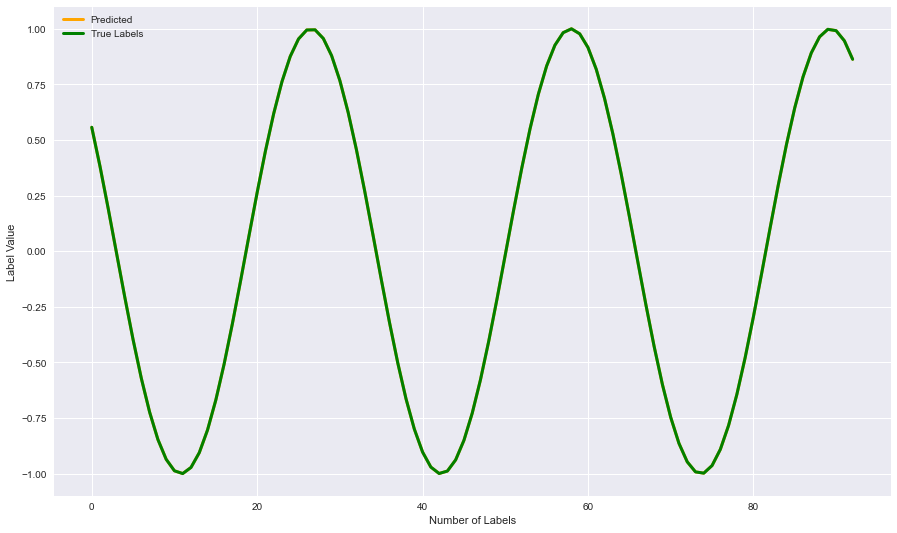

In [25]:
plt.style.use("seaborn")
plt.figure(figsize = (15, 9))
plt.plot(predictions, c = "orange", linestyle = "solid", linewidth = 3, label = "Predicted")
plt.plot(trueLabels, c = "green", linestyle = "solid", linewidth = 3, label = "True Labels")
plt.xlabel("Number of Labels")
plt.ylabel("Label Value")
plt.legend()
plt.show()